<a href="https://colab.research.google.com/github/LW567-lab/Assignment-2-WildfirePrediction/blob/main/forestfire_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive


drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/forestfires.csv")


print(df.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [5]:
print(df.info())

print(df.head())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3 

In [6]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

print("Month & Day columns converted to numerical values!")


Month & Day columns converted to numerical values!


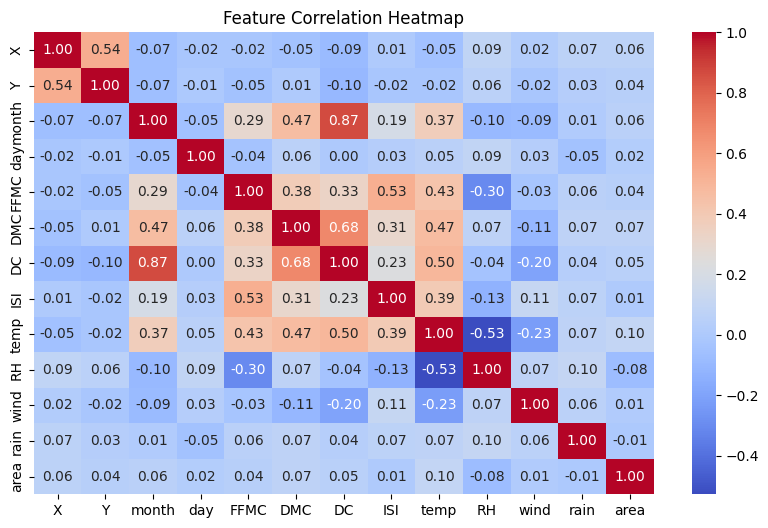

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
df["area"] = df["area"].clip(lower=df["area"].quantile(0.05), upper=df["area"].quantile(0.95))

df.to_csv("forestfires_cleaned.csv", index=False)

print("Cleaned Data Saved!")


Cleaned Data Saved!


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


df = pd.read_csv("forestfires_cleaned.csv")


X = df.drop(columns=["area"])
y = df["area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


def evaluate(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}: R² = {r2:.2f}, RMSE = {rmse:.2f}")


evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression: R² = 0.00, RMSE = 13.96
Random Forest: R² = -0.00, RMSE = 13.98


In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
import os

print(os.listdir("/content/drive/MyDrive"))


['forestfires.csv', '简历.gdoc', 'ASSN3 - PRODUCT STRATEGY TEMPLATE-team 1.gslides', 'ASSN4 - PRODUCT ROADMAP.gslides', 'Product Roadmap.gslides', 'EX5 - CUSTOMER JOURNEY MAP.gslides', 'In-Class Exercise.gslides', 'EX8 - MVP BACKLOG.gslides', '无标题演示文稿 (1).gslides', 'EX9 - TEST CASE.gsheet', 'EX6 - DESIGN SOLUTIONING.gslides', 'PRESENTATION - team 1.gslides', '无标题演示文稿.gslides', '6225 HW 1.gdoc', 'Colab Notebooks', 'forestfires_cleaned.csv', 'random_forest_model.pkl']


In [12]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/forestfires.csv")


df["area"] = df["area"].clip(lower=df["area"].quantile(0.05), upper=df["area"].quantile(0.95))


df.to_csv("/content/drive/MyDrive/forestfires_cleaned.csv", index=False)

print("Cleaned Data Saved Successfully!")


Cleaned Data Saved Successfully!


In [13]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/forestfires_cleaned.csv")


print(df.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [14]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/forestfires_cleaned.csv")


month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)


print(df.info())


df.to_csv("/content/drive/MyDrive/forestfires_cleaned.csv", index=False)
print("Categorical columns converted to numbers and data saved!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB
None
Categorical columns converted to numbers and data saved!


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/forestfires_cleaned.csv")


X = df.drop(columns=["area"])
y = df["area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


def evaluate(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}: R² = {r2:.2f}, RMSE = {rmse:.2f}")


evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression: R² = 0.00, RMSE = 13.96
Random Forest: R² = -0.00, RMSE = 13.98


In [16]:
import numpy as np
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/forestfires_cleaned.csv")


df["log_area"] = np.log1p(df["area"])
df.drop(columns=["area"], inplace=True)


df.to_csv("/content/drive/MyDrive/forestfires_cleaned.csv", index=False)

print("Log transformation applied and data saved!")


Log transformation applied and data saved!


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/forestfires_cleaned.csv")


X = df.drop(columns=["log_area"])
y = df["log_area"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


def evaluate(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}: R² = {r2:.2f}, RMSE = {rmse:.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression: R² = 0.02, RMSE = 1.32
Random Forest: R² = -0.03, RMSE = 1.35


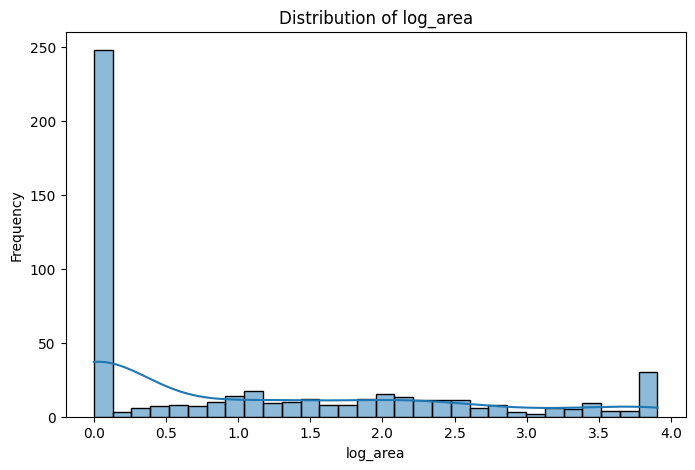

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["log_area"], bins=30, kde=True)
plt.xlabel("log_area")
plt.ylabel("Frequency")
plt.title("Distribution of log_area")
plt.show()


In [19]:

X = df.drop(columns=["log_area", "X", "Y"])
y = df["log_area"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression: R² = 0.02, RMSE = 1.32
Random Forest: R² = -0.01, RMSE = 1.34


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("/content/drive/MyDrive/forestfires_cleaned.csv")


df["fire_occurred"] = (df["log_area"] > 0).astype(int)


X = df.drop(columns=["log_area", "fire_occurred", "X", "Y"])
y = df["fire_occurred"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6153846153846154
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        51
           1       0.62      0.62      0.62        53

    accuracy                           0.62       104
   macro avg       0.62      0.62      0.62       104
weighted avg       0.62      0.62      0.62       104



In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.5769230769230769
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        51
           1       0.58      0.62      0.60        53

    accuracy                           0.58       104
   macro avg       0.58      0.58      0.58       104
weighted avg       0.58      0.58      0.58       104



In [22]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)


print("XGBoost Accuracy after SMOTE:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy after SMOTE: 0.5480769230769231
              precision    recall  f1-score   support

           0       0.54      0.51      0.53        51
           1       0.55      0.58      0.57        53

    accuracy                           0.55       104
   macro avg       0.55      0.55      0.55       104
weighted avg       0.55      0.55      0.55       104



In [23]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy after Undersampling:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy after Undersampling: 0.6153846153846154
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        51
           1       0.62      0.62      0.62        53

    accuracy                           0.62       104
   macro avg       0.62      0.62      0.62       104
weighted avg       0.62      0.62      0.62       104



In [47]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy after SMOTE + Undersampling:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy after SMOTE + Undersampling: 0.5192307692307693
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        51
           1       0.53      0.57      0.55        53

    accuracy                           0.52       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.52      0.52      0.52       104



In [48]:
print(df.columns)


Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'log_area', 'fire_occurred'],
      dtype='object')


In [49]:
X = df.drop(columns=['log_area'])
y = df['log_area']


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1. Define features (X) and target variable (y)
X = df.drop(columns=['log_area'])  # Drop the target variable from features
y = df['log_area']  # Define target variable

# 2. Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 4. Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5. Define evaluation function
def evaluate(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}: R² = {r2:.2f}, RMSE = {rmse:.2f}")

# 6. Evaluate models
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression: R² = 0.63, RMSE = 0.81
Random Forest: R² = 0.64, RMSE = 0.79


In [51]:
import joblib


joblib.dump(rf, "random_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [52]:
import joblib


loaded_rf = joblib.load("random_forest_model.pkl")


y_pred = loaded_rf.predict(X_test)

print("Model loaded and prediction completed!")


Model loaded and prediction completed!


In [53]:
from google.colab import drive
drive.mount('/content/drive')


!cp random_forest_model.pkl /content/drive/MyDrive/

print("Model saved to Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to Google Drive!


In [54]:
from google.colab import files
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Tuned XGBoost: R² = {r2:.2f}, RMSE = {rmse:.2f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Tuned XGBoost: R² = 0.61, RMSE = 0.83


In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print("Average R² Score:", scores.mean())


Cross-Validation R² Scores: [0.73640277 0.45601324 0.59192499 0.64102345 0.58438065]
Average R² Score: 0.601949018547581


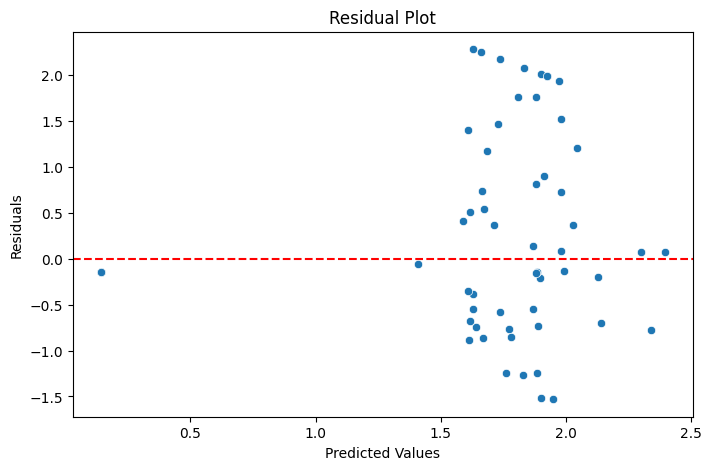

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


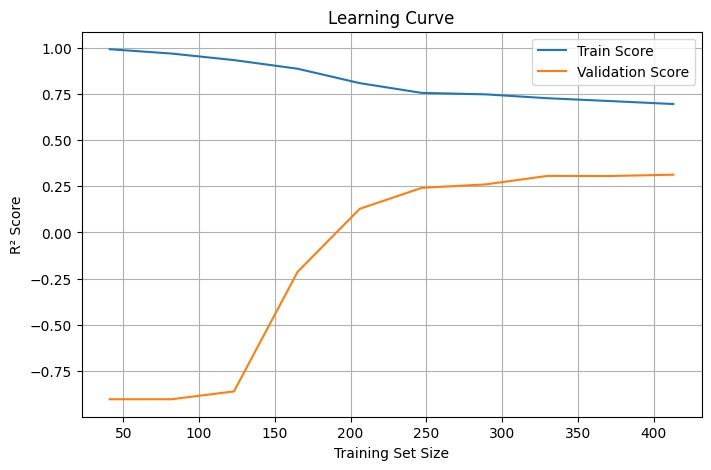

In [58]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Train Score")
plt.plot(train_sizes, val_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


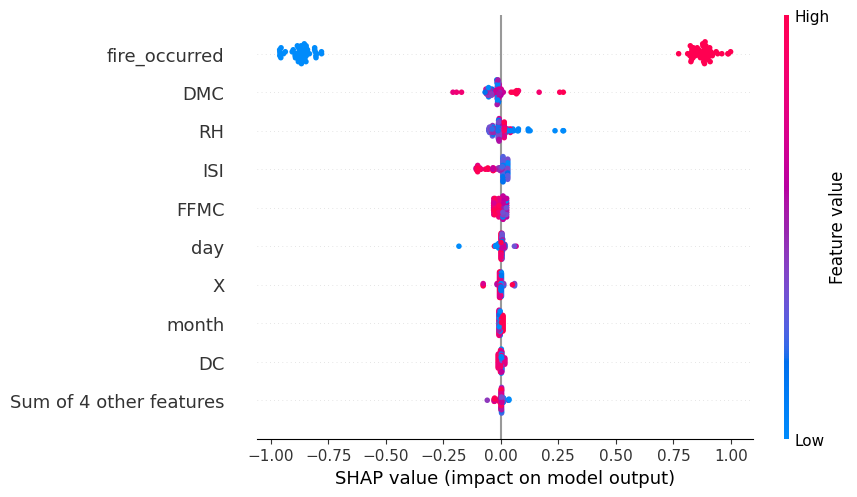

In [59]:
import shap

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)


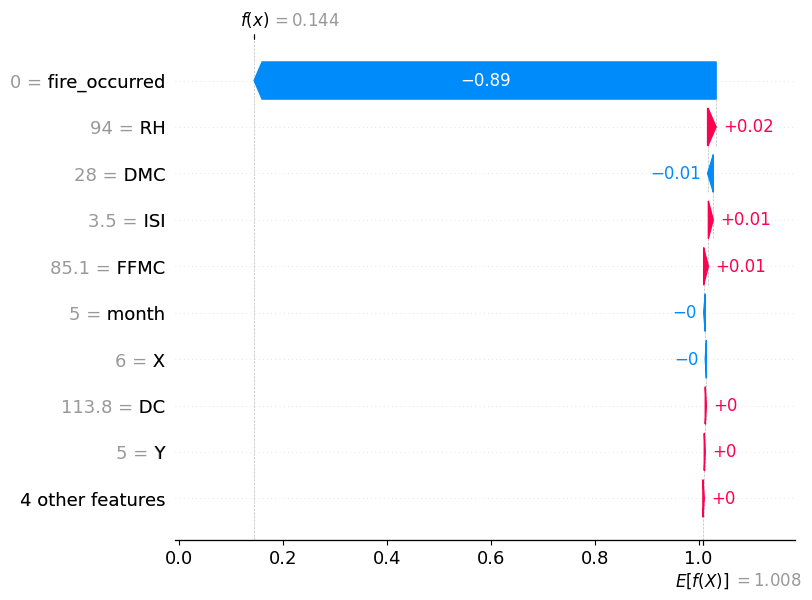

In [60]:
shap.plots.waterfall(shap_values[0])
